In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import Pythoncf as pcf
from scipy import stats

In [2]:
train=pd.read_csv("C://Users//raghu//Desktop//flight-delays//flights.csv")

C:\Users\raghu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## High Number of Missing 
train.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
            'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','YEAR','TAIL_NUMBER'],axis=1,inplace=True)

In [4]:
train.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [5]:
train.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED'],
      dtype='object')

In [6]:
train['ORIGIN_AIRPORT']=train['ORIGIN_AIRPORT'].astype('str')
train['ORIGIN_AIRPORT'].replace(to_replace=list(train['ORIGIN_AIRPORT'].value_counts()[train['ORIGIN_AIRPORT'].value_counts()<1470].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'ORIGIN_AIRPORT','ATL','ORD','DFW','DEN','LAX','SFO','PHX','IAH','LAS','MSP')

In [8]:
train['DESTINATION_AIRPORT']=train['DESTINATION_AIRPORT'].astype('str')
train['DESTINATION_AIRPORT'].replace(to_replace=list(train['DESTINATION_AIRPORT'].value_counts()[train['DESTINATION_AIRPORT'].value_counts()<1500].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'DESTINATION_AIRPORT','ATL','ORD','DFW','DEN','LAX','SFO','PHX','IAH','LAS','MSP')
train['DESTINATION_AIRPORT']=train['DESTINATION_AIRPORT'].fillna(train['DESTINATION_AIRPORT'].mode()[0])

In [9]:
train['DEPARTURE_TIME']=train['DEPARTURE_TIME'].fillna(9999)
train['ARRIVAL_TIME']=train['ARRIVAL_TIME'].fillna(9999)
train['WHEELS_OFF']=train['WHEELS_OFF'].fillna(9999)
train['WHEELS_ON']=train['WHEELS_ON'].fillna(9999)
print(1)

for var in ['SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL','ARRIVAL_TIME','WHEELS_OFF','WHEELS_ON']:
    train[var]=train[var].dropna().astype('int').astype('str')
    train[var]=train[var].apply(lambda x:x.rjust(4,'0'))
    train[var+"_hour"]=train[var].apply( lambda x: x[0:2]).astype('int')
    train[var+"_mins"]=train[var].apply( lambda x: x[2:4]).astype('int')
print(2) 

1
2


In [13]:
train.to_csv('train_new.csv')

In [14]:
train['WHEELS_OFF_mins'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'WHEELS_OFF_mins',10,9,8,11,12,13,7,14,15,6)
print(3)

train['WHEELS_ON_hour'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'WHEELS_ON_hour',16,18,20,17,14,12,13,19,10,11)
print(4)

train['WHEELS_ON_mins'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'WHEELS_ON_mins',45,40,50,53,47,49,41,48,44,42)
print(5)

train['WHEELS_OFF_hour'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'WHEELS_OFF_hour',7,10,6,17,11,15,8,12,9,14) 
print(6)

train['ARRIVAL_TIME_hour'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'ARRIVAL_TIME_hour',16,18,20,14,17,19,11,12,10,13)
print(7)

train['ARRIVAL_TIME_mins'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'ARRIVAL_TIME_mins',55,50,51,45,49,52,0,53,54,5)
print(8)

train['DEPARTURE_TIME_hour'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'DEPARTURE_TIME_hour',17,6,10,8,7,15,11,13,12,9)
print(9)

train['DEPARTURE_TIME_mins'].replace(to_replace=99, value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'DEPARTURE_TIME_mins',55,56,57,58,0,54,59,53,25,50)
print(10)

for var in ['SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL','ARRIVAL_TIME','WHEELS_OFF','WHEELS_ON']:
    train[var+"_Abstime"]=(train[var+"_hour"]*60)+train[var+"_mins"] 
print(11)

3
4
5
6
7
8
9
10
11


In [15]:
train.drop(['SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL','ARRIVAL_TIME','WHEELS_OFF','WHEELS_ON'],axis=1,inplace=True)

In [16]:
train.to_csv('train_new.csv')

In [60]:
train=pd.read_csv("train_new.csv")

In [61]:
train['SCHEDULED_TIME'].replace(to_replace=list(train['SCHEDULED_TIME'].value_counts()[train['SCHEDULED_TIME'].value_counts()<2000].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'SCHEDULED_TIME',85.0,80.0,75.0,90.0,70.0,65.0,95.0,110.0,115.0,100.0)
print(1)

train['DEPARTURE_DELAY'].replace(to_replace=list(train['DEPARTURE_DELAY'].value_counts()[train['DEPARTURE_DELAY'].value_counts()<1300].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'DEPARTURE_DELAY',-3.0,-4.0,-5.0,-2.0,-1.0,0.0,-6.0,-7.0,-8.0,1.0)
print(2)

train['TAXI_OUT'].replace(to_replace=list(train['TAXI_OUT'].value_counts()[train['TAXI_OUT'].value_counts()<6000].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'TAXI_OUT',12.0,11.0,13.0,10.0,14.0,9.0,15.0,16.0,17.0,8.0)
print(3)

train['ELAPSED_TIME'].replace(to_replace=list(train['ELAPSED_TIME'].value_counts()[train['ELAPSED_TIME'].value_counts()<1800].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'ELAPSED_TIME',80.0,79.0,81.0,82.0,78.0,77.0,76.0,83.0,84.0,75.0)
print(4)

train['AIR_TIME'].replace(to_replace=list(train['AIR_TIME'].value_counts()[train['AIR_TIME'].value_counts()<2000].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'AIR_TIME',64.0,63.0,62.0,65.0,61.0,43.0,60.0,59.0,66.0,44.0)
print(5)

train['DISTANCE']=train['DISTANCE'].clip_upper(train['DISTANCE'].quantile(.99))
train['DISTANCE']=train['DISTANCE'].clip_lower(train['DISTANCE'].quantile(.01))
r,t=stats.boxcox(train['DISTANCE'])
train['DISTANCE']=stats.boxcox(train['DISTANCE'],t)
print(6)

train['TAXI_IN'].replace(to_replace=list(train['TAXI_IN'].value_counts()[train['TAXI_IN'].value_counts()<5500].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'TAXI_IN',5.0,4.0,6.0,7.0,3.0,8.0,9.0,10.0,11.0,12.0)
print(7)

train['ARRIVAL_DELAY'].replace(to_replace=list(train['ARRIVAL_DELAY'].value_counts()[train['ARRIVAL_DELAY'].value_counts()<900].index), value=np.NaN, inplace=True)
train=pcf.replace_category10(train,'ARRIVAL_DELAY',-8.0,-9.0,-10.0,-7.0,-11.0,-6.0,-12.0,-5.0,-13.0,-4.0)
print(8)

1
2
3
4
5
6
7
8


In [74]:
# train['DESTINATION_AIRPORT']=train['DESTINATION_AIRPORT'].fillna(train['DESTINATION_AIRPORT'].mode()[0])

In [8]:
train.to_csv('train_new.csv',index=False)

In [2]:
train=pd.read_csv('train_new.csv')

In [3]:
train.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_OFF_mins,WHEELS_ON_hour,WHEELS_ON_mins,SCHEDULED_DEPARTURE_Abstime,DEPARTURE_TIME_Abstime,SCHEDULED_ARRIVAL_Abstime,ARRIVAL_TIME_Abstime,WHEELS_OFF_Abstime,WHEELS_ON_Abstime,FLIGHT_NUMBER
0,1,1,4,AS,ANC,SEA,-11.0,21.0,205.0,194.0,...,15.0,4.0,4.0,5,1434.0,270,248.0,15.0,244.0,98
1,1,1,4,AA,LAX,PBI,-8.0,12.0,280.0,279.0,...,14.0,7.0,37.0,10,2.0,470,461.0,14.0,457.0,2336
2,1,1,4,US,SFO,CLT,-2.0,16.0,286.0,293.0,...,34.0,8.0,0.0,20,18.0,486,491.0,34.0,480.0,840
3,1,1,4,AA,LAX,MIA,-5.0,15.0,285.0,281.0,...,30.0,7.0,48.0,20,15.0,485,476.0,30.0,468.0,258
4,1,1,4,AS,SEA,ANC,-1.0,11.0,235.0,215.0,...,35.0,2.0,54.0,25,24.0,200,179.0,35.0,174.0,135


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [5]:
for var in ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']:
    train[var]=encoder.fit_transform(list(train[var].values))    

In [6]:
train.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_OFF_mins,WHEELS_ON_hour,WHEELS_ON_mins,SCHEDULED_DEPARTURE_Abstime,DEPARTURE_TIME_Abstime,SCHEDULED_ARRIVAL_Abstime,ARRIVAL_TIME_Abstime,WHEELS_OFF_Abstime,WHEELS_ON_Abstime,FLIGHT_NUMBER
0,1,1,4,1,72,242,-11.0,21.0,205.0,194.0,...,15.0,4.0,4.0,5,1434.0,270,248.0,15.0,244.0,98
1,1,1,4,0,172,214,-8.0,12.0,280.0,279.0,...,14.0,7.0,37.0,10,2.0,470,461.0,14.0,457.0,2336
2,1,1,4,11,244,103,-2.0,16.0,286.0,293.0,...,34.0,8.0,0.0,20,18.0,486,491.0,34.0,480.0,840
3,1,1,4,0,172,195,-5.0,15.0,285.0,281.0,...,30.0,7.0,48.0,20,15.0,485,476.0,30.0,468.0,258
4,1,1,4,1,243,72,-1.0,11.0,235.0,215.0,...,35.0,2.0,54.0,25,24.0,200,179.0,35.0,174.0,135


In [7]:
train.dtypes

MONTH                            int64
DAY                              int64
DAY_OF_WEEK                      int64
AIRLINE                          int64
ORIGIN_AIRPORT                   int64
DESTINATION_AIRPORT              int64
DEPARTURE_DELAY                float64
TAXI_OUT                       float64
SCHEDULED_TIME                 float64
ELAPSED_TIME                   float64
AIR_TIME                       float64
DISTANCE                       float64
TAXI_IN                        float64
ARRIVAL_DELAY                  float64
DIVERTED                         int64
CANCELLED                        int64
SCHEDULED_DEPARTURE_hour         int64
SCHEDULED_DEPARTURE_mins         int64
DEPARTURE_TIME_hour            float64
DEPARTURE_TIME_mins            float64
SCHEDULED_ARRIVAL_hour           int64
SCHEDULED_ARRIVAL_mins           int64
ARRIVAL_TIME_hour              float64
ARRIVAL_TIME_mins              float64
WHEELS_OFF_hour                float64
WHEELS_OFF_mins          

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
col=train.columns.difference(['ARRIVAL_DELAY']).values
train=pd.concat([pd.DataFrame(scaler.fit_transform(train.drop('ARRIVAL_DELAY',axis=1)),columns=col),train['ARRIVAL_DELAY'].reset_index(drop=True)],axis=1)

In [10]:
train.head()

,AIRLINE,AIR_TIME,ARRIVAL_TIME_Abstime,ARRIVAL_TIME_hour,ARRIVAL_TIME_mins,CANCELLED,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,DEPARTURE_TIME_Abstime,...,SCHEDULED_TIME,TAXI_IN,TAXI_OUT,WHEELS_OFF_Abstime,WHEELS_OFF_hour,WHEELS_OFF_mins,WHEELS_ON_Abstime,WHEELS_ON_hour,WHEELS_ON_mins,ARRIVAL_DELAY
0,-1.62228,-1.67413,0.036734,-1.242252,-1.260288,1.322161,-0.768576,0.842130,0.971371,0.881790,...,-2.005763,-1.500156,-2.761058,2.097280,-2.094500,-2.067792,-2.707988,-2.088297,-1.181000,-22.0
1,-1.62228,-1.67413,0.036734,-1.458026,0.248401,0.897604,-0.631276,-0.497999,2.052538,2.110881,...,-1.428723,0.406368,-2.743875,-2.726901,-1.437733,-1.390676,-2.711338,-1.405699,0.092716,-9.0
2,-1.62228,-1.67413,0.036734,0.915486,1.334657,-0.785457,-0.356676,0.097614,2.139032,2.313319,...,-1.236377,-1.731250,-2.709509,-2.672999,-1.385192,-1.295308,-2.644333,-1.331991,-0.758705,5.0
3,-1.62228,-1.67413,0.036734,-1.458026,0.248401,0.609513,-0.493976,-0.051289,2.124616,2.139800,...,-1.428723,1.041876,-2.709509,-2.683106,-1.388476,-1.342992,-2.657734,-1.370447,-1.089939,-9.0
4,-1.62228,-1.67413,0.036734,-1.242252,1.319570,-1.255502,-0.310909,-0.646902,1.403838,1.185448,...,-2.390455,1.388517,-2.692327,-2.652786,-2.324368,-2.287140,-2.640983,-2.312626,-1.159942,-21.0


In [11]:
X = train.drop(['ARRIVAL_DELAY'], axis=1)
y = train['ARRIVAL_DELAY']

In [12]:
#Creating a training set for modeling and validation set to check model performance

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=1234)

In [13]:
from lightgbm import LGBMRegressor

In [14]:
light=LGBMRegressor(n_estimators=200,)
light.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
from sklearn import metrics

In [16]:
y_pred_t = light.predict(X_train)
rmse_t_1=np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
print (rmse_t_1,"Rmse on Training Data ")
print (metrics.r2_score( y_train, y_pred_t)," Score on Training Data")

7.50169969025165 Rmse on Training Data 
0.9207948862190398  Score on Training Data


In [17]:
# Predicting on Testing Data With  the Model 
y_pred = light.predict(X_validation)
rmse_1 = np.sqrt( metrics.mean_squared_error( y_validation, y_pred ) )
print (rmse_1,"Rmse on /Original InverseBox Cox Transform variables ")
print (metrics.r2_score( y_validation, y_pred ),"Rmse on /Original InverseBox Cox Transform variables ")

7.6453793602781595 Rmse on /Original InverseBox Cox Transform variables 
0.9176226552195175 Rmse on /Original InverseBox Cox Transform variables 


C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


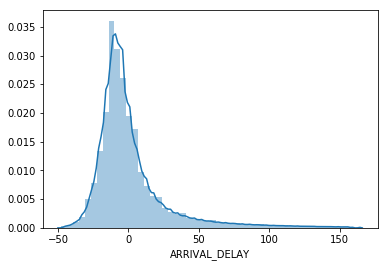

In [18]:
sns.distplot(train['ARRIVAL_DELAY'])

C:\Users\raghu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


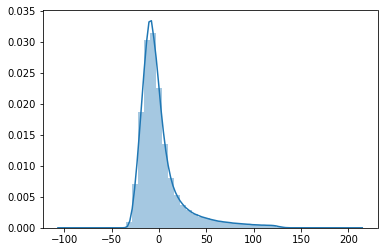

In [19]:
sns.distplot(light.predict(X))

In [20]:
np.sqrt(np.square(train['ARRIVAL_DELAY'])).mean()

16.94430682243702

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg=LinearRegression()

In [29]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred_t = linreg.predict(X_train)
rmse_t_1=np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
print (rmse_t_1,"Rmse on Training Data ")
print (metrics.r2_score( y_train, y_pred_t)," Score on Training Data")

15.189353592914419 Rmse on Training Data 
0.6752774432982113  Score on Training Data


In [31]:
# Predicting on Testing Data With  the Model 
y_pred = linreg.predict(X_validation)
rmse_1 = np.sqrt( metrics.mean_squared_error( y_validation, y_pred ) )
print (rmse_1,"Rmse on /Original InverseBox Cox Transform variables ")
print (metrics.r2_score( y_validation, y_pred ),"Rmse on /Original InverseBox Cox Transform variables ")

15.161213415127651 Rmse on /Original InverseBox Cox Transform variables 
0.67605026269665 Rmse on /Original InverseBox Cox Transform variables 


In [32]:
X_train.columns

Index(['AIRLINE', 'AIR_TIME', 'ARRIVAL_TIME_Abstime', 'ARRIVAL_TIME_hour',
       'ARRIVAL_TIME_mins', 'CANCELLED', 'DAY', 'DAY_OF_WEEK',
       'DEPARTURE_DELAY', 'DEPARTURE_TIME_Abstime', 'DEPARTURE_TIME_hour',
       'DEPARTURE_TIME_mins', 'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED',
       'ELAPSED_TIME', 'FLIGHT_NUMBER', 'MONTH', 'ORIGIN_AIRPORT',
       'SCHEDULED_ARRIVAL_Abstime', 'SCHEDULED_ARRIVAL_hour',
       'SCHEDULED_ARRIVAL_mins', 'SCHEDULED_DEPARTURE_Abstime',
       'SCHEDULED_DEPARTURE_hour', 'SCHEDULED_DEPARTURE_mins',
       'SCHEDULED_TIME', 'TAXI_IN', 'TAXI_OUT', 'WHEELS_OFF_Abstime',
       'WHEELS_OFF_hour', 'WHEELS_OFF_mins', 'WHEELS_ON_Abstime',
       'WHEELS_ON_hour', 'WHEELS_ON_mins'],
      dtype='object')

In [37]:
train[0:5]

,AIRLINE,AIR_TIME,ARRIVAL_TIME_Abstime,ARRIVAL_TIME_hour,ARRIVAL_TIME_mins,CANCELLED,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,DEPARTURE_TIME_Abstime,...,SCHEDULED_TIME,TAXI_IN,TAXI_OUT,WHEELS_OFF_Abstime,WHEELS_OFF_hour,WHEELS_OFF_mins,WHEELS_ON_Abstime,WHEELS_ON_hour,WHEELS_ON_mins,ARRIVAL_DELAY
0,-1.62228,-1.67413,0.036734,-1.242252,-1.260288,1.322161,-0.768576,0.842130,0.971371,0.881790,...,-2.005763,-1.500156,-2.761058,2.097280,-2.094500,-2.067792,-2.707988,-2.088297,-1.181000,-22.0
1,-1.62228,-1.67413,0.036734,-1.458026,0.248401,0.897604,-0.631276,-0.497999,2.052538,2.110881,...,-1.428723,0.406368,-2.743875,-2.726901,-1.437733,-1.390676,-2.711338,-1.405699,0.092716,-9.0
2,-1.62228,-1.67413,0.036734,0.915486,1.334657,-0.785457,-0.356676,0.097614,2.139032,2.313319,...,-1.236377,-1.731250,-2.709509,-2.672999,-1.385192,-1.295308,-2.644333,-1.331991,-0.758705,5.0
3,-1.62228,-1.67413,0.036734,-1.458026,0.248401,0.609513,-0.493976,-0.051289,2.124616,2.139800,...,-1.428723,1.041876,-2.709509,-2.683106,-1.388476,-1.342992,-2.657734,-1.370447,-1.089939,-9.0
4,-1.62228,-1.67413,0.036734,-1.242252,1.319570,-1.255502,-0.310909,-0.646902,1.403838,1.185448,...,-2.390455,1.388517,-2.692327,-2.652786,-2.324368,-2.287140,-2.640983,-2.312626,-1.159942,-21.0


In [36]:
light.predict(train[0:5].drop('ARRIVAL_DELAY',axis=1))

array([-17.17449685, -11.77630913,   4.97437143,  -7.95949454,
       -19.98302087])